# Kelompok 9 Machine Learning Pagi C

In [1322]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

import plotly.express as px
import joblib

In [1323]:
# Membaca empat file CSV dengan pemisah titik koma (;) menjadi dataframe
df1 = pd.read_csv("penduduk.csv", sep=';')
df2 = pd.read_csv("penduduk_miskin.csv", sep=';')
df3 = pd.read_csv("avg.csv", sep=';')
df4 = pd.read_csv("tpak.csv", sep=';')
df5 = pd.read_csv("umr.csv", sep=';')

In [1324]:
# Membersihkan kolom numerik di tiap dataframe: mengubah koma ke titik dan konversi ke angka
numeric_cols = [
    'jumlah_penduduk',
    'jumlah_penduduk_miskin',
    'tingkat_partisipasi_angkatan_kerja',
    'besaran_upah_minimum'
]

for col in numeric_cols:
    for df in [df1, df2, df3, df4, df5]:
        if col in df.columns:
            df[col] = (df[col]
                       .astype(str)
                       .str.replace(',', '.', regex=False)
                       .str.replace(' ', '', regex=False))
            df[col] = pd.to_numeric(df[col], errors='coerce')


In [1325]:
df1.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_penduduk,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,4813.88,RIBU ORANG,2010
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,2358.42,RIBU ORANG,2010
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,2186.79,RIBU ORANG,2010
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,3205.12,RIBU ORANG,2010
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,2422.33,RIBU ORANG,2010


In [1326]:
df2.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_penduduk_miskin,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,451.3,RIBU JIWA,2002
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,362.2,RIBU JIWA,2002
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,368.6,RIBU JIWA,2002
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,543.3,RIBU JIWA,2002
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,323.7,RIBU JIWA,2002


In [1327]:
df3.head()

,nama_kabupaten_kota,lama_sekolah,tahun
0,KABUPATEN BOGOR,9,2019
1,KABUPATEN SUKABUMI,8,2019
2,KABUPATEN CIANJUR,7,2019
3,KABUPATEN BANDUNG,9,2019
4,KABUPATEN GARUT,8,2019


In [1328]:
df4.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,tingkat_partisipasi_angkatan_kerja,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,62.54,PERSEN,2011
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,62.05,PERSEN,2011
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,62.65,PERSEN,2011
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,62.20,PERSEN,2011
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,60.94,PERSEN,2011


In [1329]:
df5.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,besaran_upah_minimum,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,3204551.00,RUPIAH,2017
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,2376558.39,RUPIAH,2017
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,1989115.00,RUPIAH,2017
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,2463461.49,RUPIAH,2017
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,1538909.00,RUPIAH,2017


In [1330]:
# 1. Memilah kolom penting dari df1 dan menyaring data hanya untuk tahun 2022–2024
df1 = df1[[
    'kode_kabupaten_kota',
    'nama_kabupaten_kota',
    'jumlah_penduduk',
    'tahun'
]]

df1 = df1[df1['tahun'].isin([2024, 2023, 2022])]

In [1331]:
# 2. Memilah kolom penting dari df2 dan menyaring data hanya untuk tahun 2022–2024
f2 = df2[[
    'kode_kabupaten_kota',
    'nama_kabupaten_kota',
    'jumlah_penduduk_miskin',
    'tahun'
]]

df2 = df2[df2['tahun'].isin([2024, 2023, 2022])]

In [1332]:
# 3. Memilah kolom penting dari df3 dan menyaring data hanya untuk tahun 2022–2024
df3 = df3[[
    'nama_kabupaten_kota',
    'lama_sekolah',
    'tahun'
]]

df3 = df3[df3['tahun'].isin([2024, 2023, 2022])]

In [1333]:
# 4. Memilah kolom penting dari df4 dan menyaring data hanya untuk tahun 2022–2024
df4 = df4[[
    'kode_kabupaten_kota',
    'nama_kabupaten_kota',
    'tingkat_partisipasi_angkatan_kerja',
    'tahun'
]]

df4 = df4[df4['tahun'].isin([2024, 2023, 2022])]

In [1334]:
# 5. Memilah kolom penting dari df4 dan menyaring data hanya untuk tahun 2022–2024
df5 = df5[[
    'kode_kabupaten_kota',
    'nama_kabupaten_kota',
    'besaran_upah_minimum',
    'tahun'
]]

df5 = df5[df5['tahun'].isin([2024, 2023, 2022])]

In [1335]:
# 5. Menggabungkan df1 dan df2 berdasarkan kolom yang cocok menggunakan inner join
df_12 = pd.merge(
    df1,
    df2,
    on=['nama_kabupaten_kota', 'tahun'],
    how='inner'
)

df_12.head()

,kode_kabupaten_kota_x,nama_kabupaten_kota,jumlah_penduduk,tahun,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota_y,jumlah_penduduk_miskin,satuan
0,3201,KABUPATEN BOGOR,5556.31,2022,541,32,JAWA BARAT,3201,474.7,RIBU JIWA
1,3202,KABUPATEN SUKABUMI,2775.31,2022,542,32,JAWA BARAT,3202,186.3,RIBU JIWA
2,3203,KABUPATEN CIANJUR,2529.81,2022,543,32,JAWA BARAT,3203,246.8,RIBU JIWA
3,3204,KABUPATEN BANDUNG,3687.25,2022,544,32,JAWA BARAT,3204,258.6,RIBU JIWA
4,3205,KABUPATEN GARUT,2648.95,2022,545,32,JAWA BARAT,3205,276.7,RIBU JIWA


In [1336]:
# 6. Menggabungkan df_12 dan df3 berdasarkan kolom yang sama dengan inner join
df_123 = pd.merge(
    df_12,
    df3,
    on=['nama_kabupaten_kota', 'tahun'],
    how='inner'
)

df_123.head()

,kode_kabupaten_kota_x,nama_kabupaten_kota,jumlah_penduduk,tahun,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota_y,jumlah_penduduk_miskin,satuan,lama_sekolah
0,3201,KABUPATEN BOGOR,5556.31,2022,541,32,JAWA BARAT,3201,474.7,RIBU JIWA,9
1,3202,KABUPATEN SUKABUMI,2775.31,2022,542,32,JAWA BARAT,3202,186.3,RIBU JIWA,8
2,3203,KABUPATEN CIANJUR,2529.81,2022,543,32,JAWA BARAT,3203,246.8,RIBU JIWA,7
3,3204,KABUPATEN BANDUNG,3687.25,2022,544,32,JAWA BARAT,3204,258.6,RIBU JIWA,9
4,3205,KABUPATEN GARUT,2648.95,2022,545,32,JAWA BARAT,3205,276.7,RIBU JIWA,8


In [1337]:
# 7. Menggabungkan beberapa dataset menjadi satu dataframe dengan inner join
df_1234 = pd.merge(
    df_123,
    df4,
    on=['nama_kabupaten_kota', 'tahun'],
    how='inner'
)

df_1234.head()

,kode_kabupaten_kota_x,nama_kabupaten_kota,jumlah_penduduk,tahun,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota_y,jumlah_penduduk_miskin,satuan,lama_sekolah,kode_kabupaten_kota,tingkat_partisipasi_angkatan_kerja
0,3201,KABUPATEN BOGOR,5556.31,2022,541,32,JAWA BARAT,3201,474.7,RIBU JIWA,9,3201,63.75
1,3202,KABUPATEN SUKABUMI,2775.31,2022,542,32,JAWA BARAT,3202,186.3,RIBU JIWA,8,3202,69.11
2,3203,KABUPATEN CIANJUR,2529.81,2022,543,32,JAWA BARAT,3203,246.8,RIBU JIWA,7,3203,69.98
3,3204,KABUPATEN BANDUNG,3687.25,2022,544,32,JAWA BARAT,3204,258.6,RIBU JIWA,9,3204,63.64
4,3205,KABUPATEN GARUT,2648.95,2022,545,32,JAWA BARAT,3205,276.7,RIBU JIWA,8,3205,68.84


In [1338]:
df_final = pd.merge(
    df_1234,
    df5[['nama_kabupaten_kota', 'tahun', 'besaran_upah_minimum']],
    on=['nama_kabupaten_kota', 'tahun'],
    how='inner'
)

df_final.head()

,kode_kabupaten_kota_x,nama_kabupaten_kota,jumlah_penduduk,tahun,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota_y,jumlah_penduduk_miskin,satuan,lama_sekolah,kode_kabupaten_kota,tingkat_partisipasi_angkatan_kerja,besaran_upah_minimum
0,3201,KABUPATEN BOGOR,5556.31,2022,541,32,JAWA BARAT,3201,474.7,RIBU JIWA,9,3201,63.75,4217206.00
1,3202,KABUPATEN SUKABUMI,2775.31,2022,542,32,JAWA BARAT,3202,186.3,RIBU JIWA,8,3202,69.11,3125444.72
2,3203,KABUPATEN CIANJUR,2529.81,2022,543,32,JAWA BARAT,3203,246.8,RIBU JIWA,7,3203,69.98,2699814.40
3,3204,KABUPATEN BANDUNG,3687.25,2022,544,32,JAWA BARAT,3204,258.6,RIBU JIWA,9,3204,63.64,3241929.67
4,3205,KABUPATEN GARUT,2648.95,2022,545,32,JAWA BARAT,3205,276.7,RIBU JIWA,8,3205,68.84,1975220.92


In [1339]:
# 8. Cek Missing Values (Mengecek jumlah nilai kosong (null) di setiap kolom dataframe)
df_final.isnull().sum()

kode_kabupaten_kota_x                 0
nama_kabupaten_kota                   0
jumlah_penduduk                       0
tahun                                 0
id                                    0
kode_provinsi                         0
nama_provinsi                         0
kode_kabupaten_kota_y                 0
jumlah_penduduk_miskin                0
satuan                                0
lama_sekolah                          0
kode_kabupaten_kota                   0
tingkat_partisipasi_angkatan_kerja    0
besaran_upah_minimum                  0
dtype: int64

In [1340]:
# 9. Tampilan Final Dataset dengan menampilkan 35 baris pertama dataframe
final_df = df_final[['nama_kabupaten_kota',
                     'tahun',
                     'jumlah_penduduk',
                     'jumlah_penduduk_miskin',
                     'lama_sekolah',
                     'tingkat_partisipasi_angkatan_kerja',
                     'besaran_upah_minimum']]

final_df.head(35)

,nama_kabupaten_kota,tahun,jumlah_penduduk,jumlah_penduduk_miskin,lama_sekolah,tingkat_partisipasi_angkatan_kerja,besaran_upah_minimum
0,KABUPATEN BOGOR,2022,5556.31,474.7,9,63.75,4217206.00
1,KABUPATEN SUKABUMI,2022,2775.31,186.3,8,69.11,3125444.72
2,KABUPATEN CIANJUR,2022,2529.81,246.8,7,69.98,2699814.40
3,KABUPATEN BANDUNG,2022,3687.25,258.6,9,63.64,3241929.67
4,KABUPATEN GARUT,2022,2648.95,276.7,8,68.84,1975220.92
5,KABUPATEN TASIKMALAYA,2022,1892.22,194.1,8,67.83,2326772.46
6,KABUPATEN CIAMIS,2022,1243.32,94.0,8,68.47,1897867.14
7,KABUPATEN KUNINGAN,2022,1189.01,140.3,8,61.80,1908102.17
8,KABUPATEN CIREBON,2022,2331.36,266.1,8,65.53,2279982.77
9,KABUPATEN MAJALENGKA,2022,1328.01,147.1,8,66.21,2027619.04


In [1341]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   kode_kabupaten_kota_x               81 non-null     int64  
 1   nama_kabupaten_kota                 81 non-null     object 
 2   jumlah_penduduk                     81 non-null     float64
 3   tahun                               81 non-null     int64  
 4   id                                  81 non-null     int64  
 5   kode_provinsi                       81 non-null     int64  
 6   nama_provinsi                       81 non-null     object 
 7   kode_kabupaten_kota_y               81 non-null     int64  
 8   jumlah_penduduk_miskin              81 non-null     float64
 9   satuan                              81 non-null     object 
 10  lama_sekolah                        81 non-null     int64  
 11  kode_kabupaten_kota                 81 non-null

In [1342]:
# Mengubah nilai TPAK dari format koma ke float agar bisa dianalisis.
final_df['tingkat_partisipasi_angkatan_kerja'] = (
    final_df['tingkat_partisipasi_angkatan_kerja']
    .astype(str)
    .str.replace(',', '.', regex=False)
    .astype(float)
)

C:\Users\muham\AppData\Local\Temp\ipykernel_14116\1136074159.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



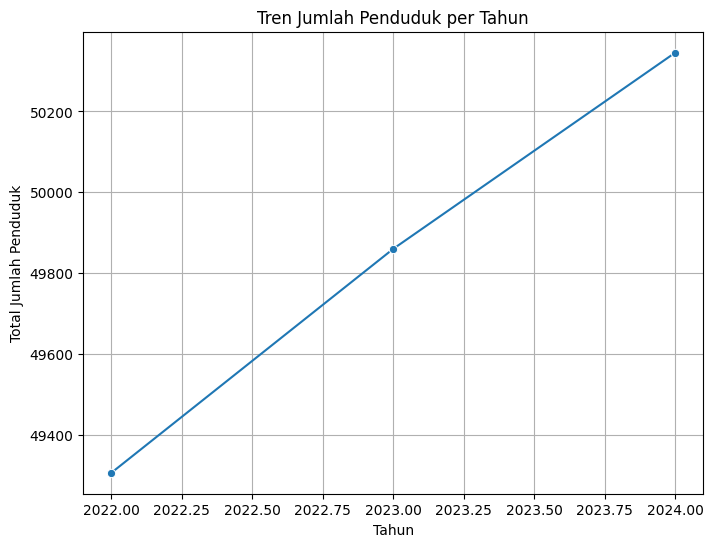

In [1343]:
# EDA (Exploratory Data Analysis)
# 1. Line Plot – Tren Jumlah Penduduk per Tahun
df_line_penduduk = final_df.groupby('tahun')['jumlah_penduduk'].sum().reset_index()

plt.figure(figsize=(8, 6))
sns.lineplot(x='tahun', y='jumlah_penduduk', data=df_line_penduduk, marker='o')
plt.title('Tren Jumlah Penduduk per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Total Jumlah Penduduk')
plt.grid(True)
plt.show()

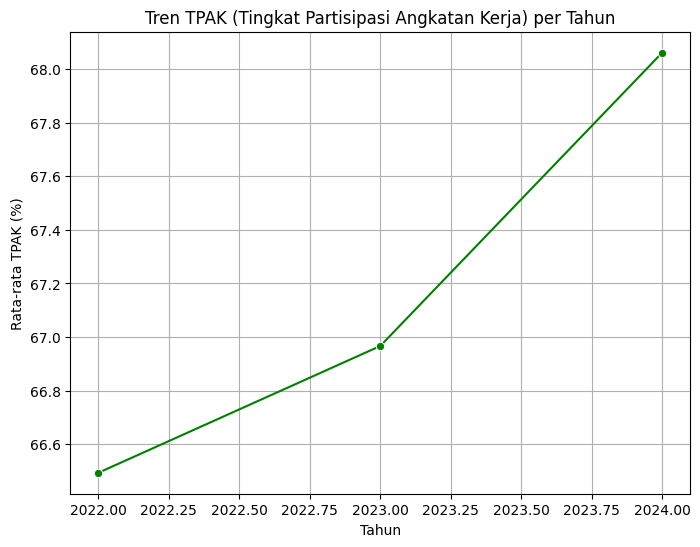

In [1344]:
# 2. Line Plot – Tren Jumlah Penduduk Miskin per Tahun
df_line_tpak = final_df.groupby('tahun')['tingkat_partisipasi_angkatan_kerja'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.lineplot(x='tahun', y='tingkat_partisipasi_angkatan_kerja', data=df_line_tpak,
             marker='o', color='green')
plt.title('Tren TPAK (Tingkat Partisipasi Angkatan Kerja) per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata TPAK (%)')
plt.grid(True)
plt.show()

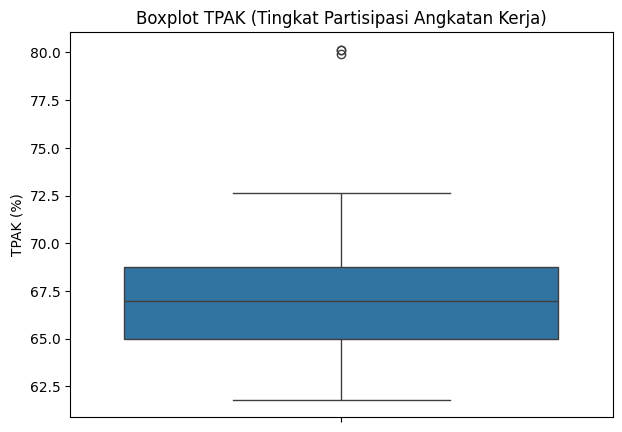

In [1345]:
# 3. Boxplot TPAK (Tingkat Partisipasi Angkatan Kerja)
plt.figure(figsize=(7,5))
sns.boxplot(y=final_df['tingkat_partisipasi_angkatan_kerja'])
plt.title('Boxplot TPAK (Tingkat Partisipasi Angkatan Kerja)')
plt.ylabel('TPAK (%)')
plt.show()

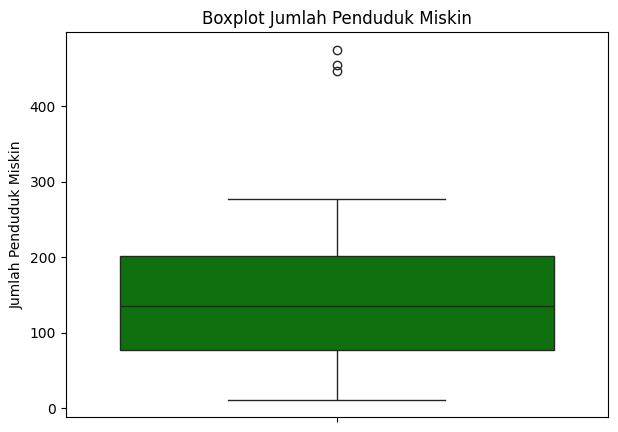

In [1346]:
# 4. Boxplot Jumlah Penduduk Miskin
plt.figure(figsize=(7,5))
sns.boxplot(y=final_df['jumlah_penduduk_miskin'], color='green')
plt.title('Boxplot Jumlah Penduduk Miskin')
plt.ylabel('Jumlah Penduduk Miskin')
plt.show()

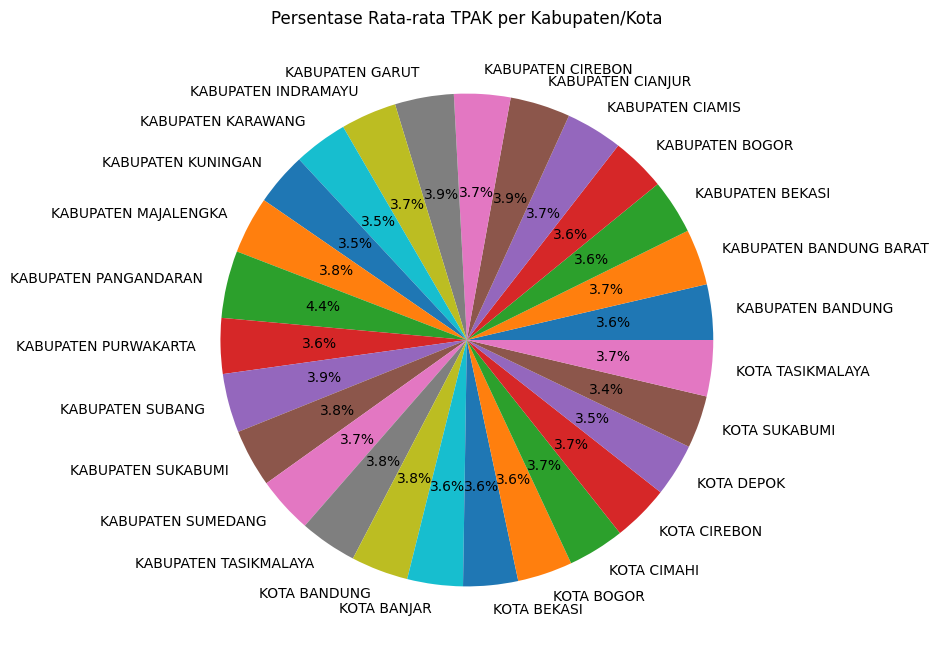

In [1347]:
# 5. Pie Chart – Persentase Rata-rata TPAK per Kabupaten/Kota
df_pie_tpak = final_df.groupby('nama_kabupaten_kota')['tingkat_partisipasi_angkatan_kerja'].mean()

plt.figure(figsize=(8,8))
plt.pie(df_pie_tpak, labels=df_pie_tpak.index, autopct='%1.1f%%')
plt.title('Persentase Rata-rata TPAK per Kabupaten/Kota')
plt.show()

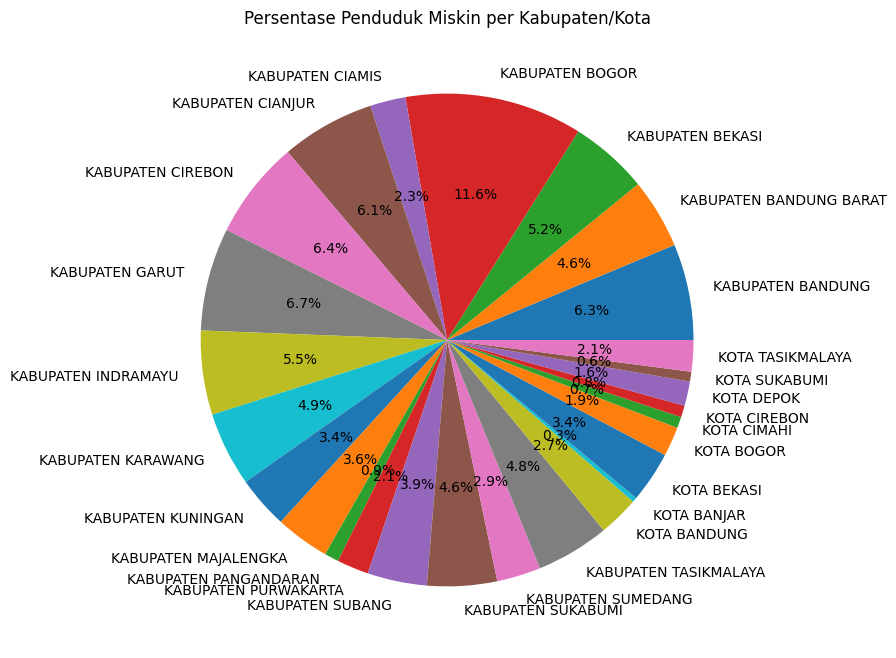

In [1348]:
# 6. Pie Chart 2 – Jumlah Penduduk Miskin per Kabupaten/Kota
df_pie_miskin = final_df.groupby('nama_kabupaten_kota')['jumlah_penduduk_miskin'].sum()

plt.figure(figsize=(8,8))
plt.pie(df_pie_miskin, labels=df_pie_miskin.index, autopct='%1.1f%%')
plt.title('Persentase Penduduk Miskin per Kabupaten/Kota')
plt.show()

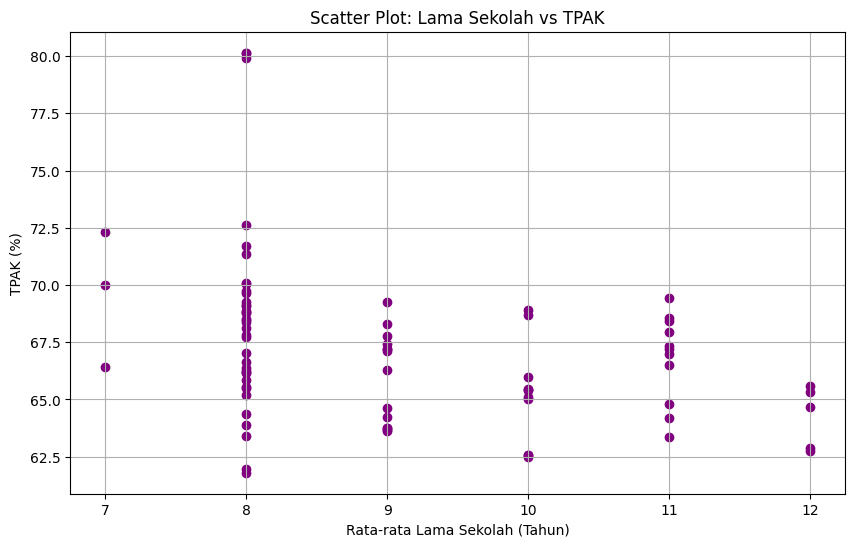

In [1349]:
# 7. Scatter Plot – Rata-rata Lama Sekolah vs TPAK
plt.figure(figsize=(10,6))
plt.scatter(final_df['lama_sekolah'], final_df['tingkat_partisipasi_angkatan_kerja'], color='purple')
plt.title('Scatter Plot: Lama Sekolah vs TPAK')
plt.xlabel('Rata-rata Lama Sekolah (Tahun)')
plt.ylabel('TPAK (%)')
plt.grid(True)
plt.show()

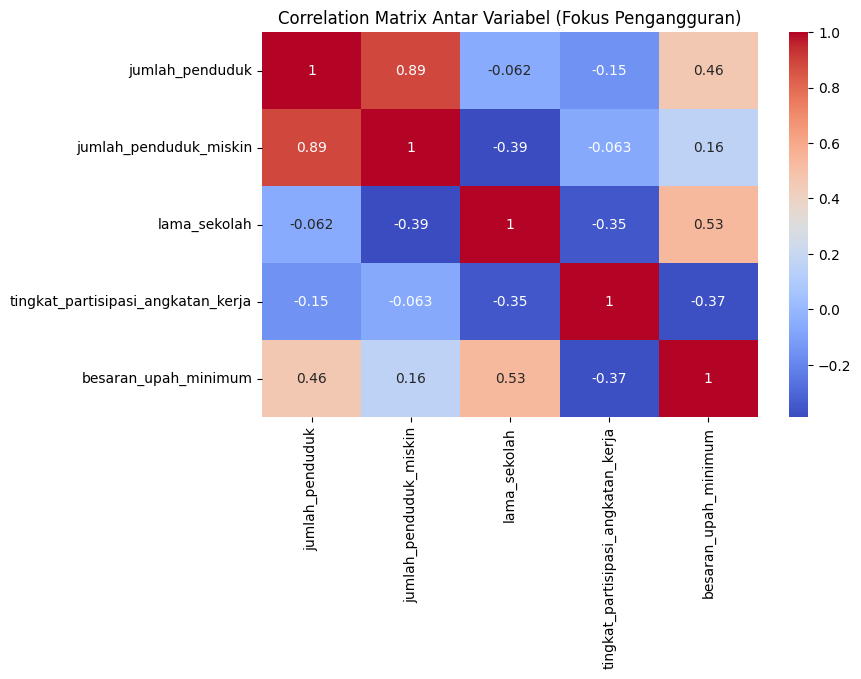

In [1350]:
# 8. Correlation Matrix + Heatmap
plt.figure(figsize=(8,5))
sns.heatmap(
    final_df[['jumlah_penduduk',
              'jumlah_penduduk_miskin',
              'lama_sekolah',
              'tingkat_partisipasi_angkatan_kerja',
              'besaran_upah_minimum']].corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title('Correlation Matrix Antar Variabel (Fokus Pengangguran)')
plt.show()

In [1351]:
# 9. Membuat visualisasi 3D dengan tambahan UMR
fig = px.scatter_3d(
    final_df,
    x='lama_sekolah',
    y='jumlah_penduduk_miskin',
    z='tingkat_partisipasi_angkatan_kerja',
    color='besaran_upah_minimum',
    size='jumlah_penduduk_miskin',
    hover_data=[
        'nama_kabupaten_kota', 'tahun',
        'lama_sekolah',
        'jumlah_penduduk_miskin',
        'tingkat_partisipasi_angkatan_kerja',
        'besaran_upah_minimum'
    ],
    hover_name='nama_kabupaten_kota',
    title='Hubungan Pendidikan, Kemiskinan, TPAK & UMR di Setiap Kabupaten/Kota'
)

fig.show()


# Fase 3: Modeling (Regresi Linier Berganda)

In [1352]:
# 1. Menentukan fitur (X) dan target (y) dari dataset.
X = final_df[['jumlah_penduduk',
              'jumlah_penduduk_miskin',
              'lama_sekolah',
              'besaran_upah_minimum'
              ]]

y = final_df['tingkat_partisipasi_angkatan_kerja']


In [1353]:
final_df["tpak_delta"] = final_df["tingkat_partisipasi_angkatan_kerja"].diff()

C:\Users\muham\AppData\Local\Temp\ipykernel_14116\4092938061.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1354]:
df_model = final_df.dropna()

In [1355]:
X = df_model[[
    "jumlah_penduduk",
    "jumlah_penduduk_miskin",
    "lama_sekolah",
    "besaran_upah_minimum"
    
]]

y = df_model["tpak_delta"]

In [1356]:
# 2. Membagi data menjadi training dan testing dengan proporsi 80:20.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [1357]:
# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [1358]:
# 3. Membuat dan melatih model regresi linear
model_pengangguran = LinearRegression()
model_pengangguran.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [1359]:
# 4. Mengambil nilai intercept (titik potong) dari model regresi.
intercept = model_pengangguran.intercept_
intercept

np.float64(-0.12499999999999864)

In [1360]:
df_final.head()

,kode_kabupaten_kota_x,nama_kabupaten_kota,jumlah_penduduk,tahun,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota_y,jumlah_penduduk_miskin,satuan,lama_sekolah,kode_kabupaten_kota,tingkat_partisipasi_angkatan_kerja,besaran_upah_minimum
0,3201,KABUPATEN BOGOR,5556.31,2022,541,32,JAWA BARAT,3201,474.7,RIBU JIWA,9,3201,63.75,4217206.00
1,3202,KABUPATEN SUKABUMI,2775.31,2022,542,32,JAWA BARAT,3202,186.3,RIBU JIWA,8,3202,69.11,3125444.72
2,3203,KABUPATEN CIANJUR,2529.81,2022,543,32,JAWA BARAT,3203,246.8,RIBU JIWA,7,3203,69.98,2699814.40
3,3204,KABUPATEN BANDUNG,3687.25,2022,544,32,JAWA BARAT,3204,258.6,RIBU JIWA,9,3204,63.64,3241929.67
4,3205,KABUPATEN GARUT,2648.95,2022,545,32,JAWA BARAT,3205,276.7,RIBU JIWA,8,3205,68.84,1975220.92


In [1361]:
# 5. Mengambil nilai koefisien regresi dari model.
coefficients = model_pengangguran.coef_
coefficients

array([ 4.41317493, -3.82948076, -1.086191  , -2.40996438])

In [1362]:
# ambil koefisien
coef1, coef2, coef3, coef4 = model_pengangguran.coef_

manual = (
    intercept
    + (3000 * coef1)   # jumlah_penduduk
    + (200 * coef2)    # jumlah_penduduk_miskin
    + (9 * coef3)      # lama_sekolah
    + (3000000 * coef4)  # besaran_upah_minimum (contoh nilai UMR)
)

manual


np.float64(-7217429.421831588)

In [1363]:
# Input manual dan memprediksi nilai dengan model.
input_data = np.array([[3000, 200, 9, 3000000]])  # UMR contoh

predicted_tpak = model_pengangguran.predict(input_data)
predicted_tpak


array([-7217429.42183159])

In [1364]:
# 6. Menghasilkan prediksi dari model menggunakan data uji.
y_pred = model_pengangguran.predict(X_test_scaled)

In [1365]:
# 7.  Menghitung metrik evaluasi regresi (MAE, MSE, RMSE, dan R2).
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE :", mae)
print("MSE :", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

MAE : 2.8228774913977395
MSE : 12.763460193721928
RMSE: 3.572598521205808
R2 Score: 0.26423445988592453


In [1366]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [1367]:
model = LinearRegression()
model.fit(X_scaled, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [1368]:
import pandas as pd
import joblib
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# ===============================
# LOAD & MERGE DATA
# ===============================
df_tpak = pd.read_csv('tpak.csv', sep=';', decimal=',')
df_penduduk = pd.read_csv('penduduk.csv', sep=';', decimal=',')
df_miskin = pd.read_csv('penduduk_miskin.csv', sep=';', decimal=',')
df_sekolah = pd.read_csv('avg.csv', sep=';', decimal=',')
df_umr = pd.read_csv('umr.csv', sep=';', decimal=',')

df = (
    df_tpak
    .merge(df_penduduk[['nama_kabupaten_kota','tahun','jumlah_penduduk']],
           on=['nama_kabupaten_kota','tahun'])
    .merge(df_miskin[['nama_kabupaten_kota','tahun','jumlah_penduduk_miskin']],
           on=['nama_kabupaten_kota','tahun'])
    .merge(df_sekolah[['nama_kabupaten_kota','tahun','lama_sekolah']],
           on=['nama_kabupaten_kota','tahun'])
    .merge(df_umr[['nama_kabupaten_kota','tahun','besaran_upah_minimum']],
           on=['nama_kabupaten_kota','tahun'])
)

df = df[df['tahun'].between(2022, 2024)]

# ===============================
# FITUR & TARGET
# ===============================
X = df[[
    'jumlah_penduduk',
    'jumlah_penduduk_miskin',
    'lama_sekolah',
    'besaran_upah_minimum'
]]

y = df['tingkat_partisipasi_angkatan_kerja']

# ===============================
# SCALING
# ===============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ===============================
# TRAIN MODEL
# ===============================
model = LinearRegression()
model.fit(X_scaled, y)

# ===============================
# SAVE MODEL
# ===============================
joblib.dump(model, 'model_regresi.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("✅ Model & scaler berhasil dilatih ulang dengan 4 variabel")


✅ Model & scaler berhasil dilatih ulang dengan 4 variabel
